### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
# Calcular ingresos por tienda
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

# Mostrar resultados
print(f"Ingreso total Tienda 1: {ingreso_tienda1}")
print(f"Ingreso total Tienda 2: {ingreso_tienda2}")
print(f"Ingreso total Tienda 3: {ingreso_tienda3}")
print(f"Ingreso total Tienda 4: {ingreso_tienda4}")

Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


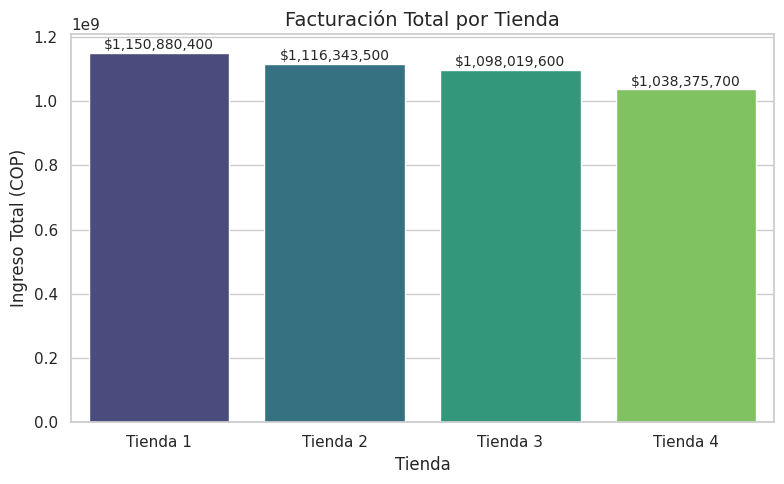

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ingresos
ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [
        tienda["Precio"].sum(),
        tienda2["Precio"].sum(),
        tienda3["Precio"].sum(),
        tienda4["Precio"].sum()
    ]
})

# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

# Gráfico de barras
sns.barplot(x="Tienda", y="Ingreso Total", hue="Tienda", data=ingresos, palette="viridis", legend=False)

# Títulos y etiquetas
plt.title("Facturación Total por Tienda", fontsize=14)
plt.ylabel("Ingreso Total (COP)", fontsize=12)
plt.xlabel("Tienda", fontsize=12)

# Mostrar valores encima de cada barra
for i, valor in enumerate(ingresos["Ingreso Total"]):
    plt.text(i, valor + (valor * 0.01), f"${valor:,.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [4]:
# Cantidad de productos vendidos por categoría en cada tienda
ventas_categoria_t1 = tienda.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
ventas_categoria_t2 = tienda2.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
ventas_categoria_t3 = tienda3.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
ventas_categoria_t4 = tienda4.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)

print("Tienda 1 - Categorías más populares:")
print(ventas_categoria_t1)
print("\nTienda 2 - Categorías más populares:")
print(ventas_categoria_t2)
print("\nTienda 3 - Categorías más populares:")
print(ventas_categoria_t3)
print("\nTienda 4 - Categorías más populares:")
print(ventas_categoria_t4)


Tienda 1 - Categorías más populares:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64

Tienda 2 - Categorías más populares:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64

Tienda 3 - Categorías más populares:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Producto, 

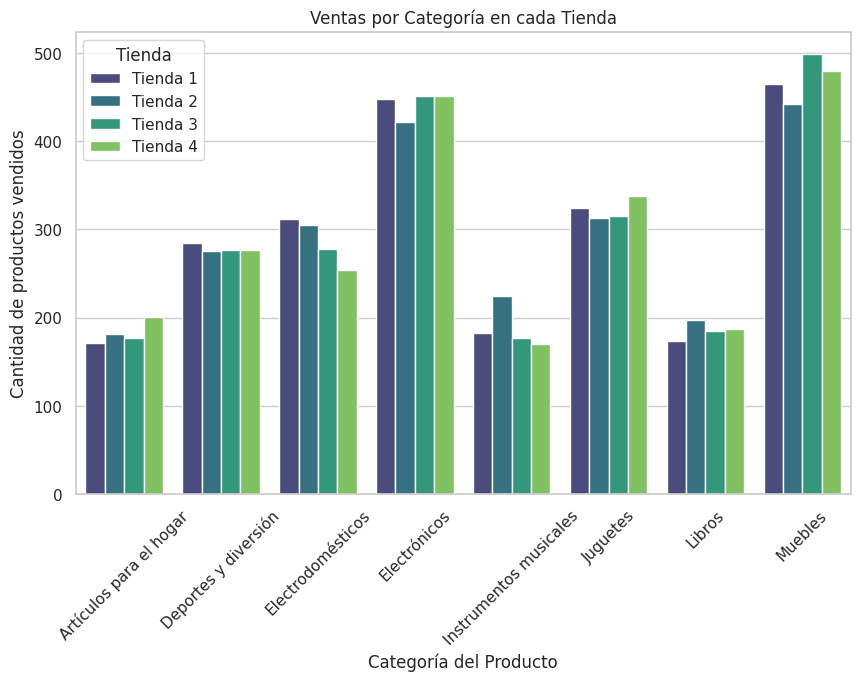

In [7]:
# Unir datos de todas las tiendas con un identificador
t1 = tienda.copy()
t1["Tienda"] = "Tienda 1"

t2 = tienda2.copy()
t2["Tienda"] = "Tienda 2"

t3 = tienda3.copy()
t3["Tienda"] = "Tienda 3"

t4 = tienda4.copy()
t4["Tienda"] = "Tienda 4"

# Concatenar todo
todas_tiendas = pd.concat([t1, t2, t3, t4])

# Agrupar por tienda y categoría
ventas_categorias = todas_tiendas.groupby(["Tienda", "Categoría del Producto"])["Producto"].count().reset_index()

# Gráfico agrupado
plt.figure(figsize=(10,6))
sns.barplot(
    x="Categoría del Producto",
    y="Producto",
    hue="Tienda",
    data=ventas_categorias,
    palette="viridis"
)
plt.title("Ventas por Categoría en cada Tienda")
plt.ylabel("Cantidad de productos vendidos")
plt.xticks(rotation=45)
plt.show()

# 3. Calificación promedio de la tienda


In [11]:
# Calcular calificación promedio por tienda
calif_t1 = tienda["Calificación"].mean()
calif_t2 = tienda2["Calificación"].mean()
calif_t3 = tienda3["Calificación"].mean()
calif_t4 = tienda4["Calificación"].mean()

# Mostrar resultados
print(f"Calificación promedio Tienda 1: {calif_t1:.2f}")
print(f"Calificación promedio Tienda 2: {calif_t2:.2f}")
print(f"Calificación promedio Tienda 3: {calif_t3:.2f}")
print(f"Calificación promedio Tienda 4: {calif_t4:.2f}")

promedios = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [calif_t1, calif_t2, calif_t3, calif_t4]
})

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


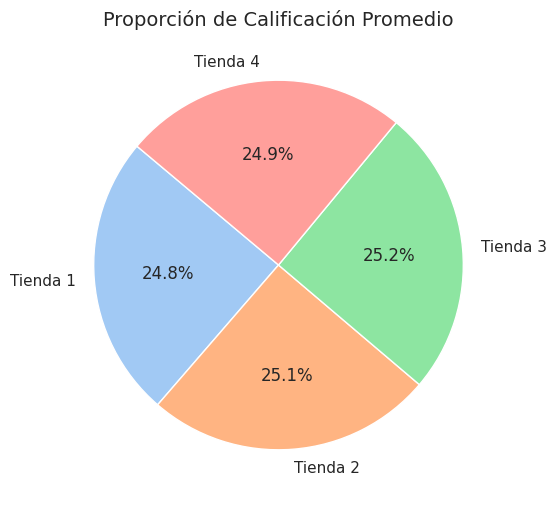

In [13]:
plt.figure(figsize=(6,6))
plt.pie(
    promedios["Calificación Promedio"],
    labels=promedios["Tienda"],
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Proporción de Calificación Promedio", fontsize=14)
plt.show()

# 4. Productos más y menos vendidos

### *Tienda 1*

In [16]:
def productos_mas_menos_vendidos(df, nombre_tienda, top_n=5):
    conteo = df.groupby("Producto")["Producto"].count().sort_values(ascending=False)
    mas_vendidos = conteo.head(top_n)
    menos_vendidos = conteo.tail(top_n)
    return mas_vendidos, menos_vendidos

mas_t1, menos_t1 = productos_mas_menos_vendidos(tienda, "Tienda 1")

print("Más vendidos Tienda 1:")
print(mas_t1)
print("\nMenos vendidos Tienda 1:")
print(menos_t1)

Más vendidos Tienda 1:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Producto, dtype: int64

Menos vendidos Tienda 1:
Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
Name: Producto, dtype: int64


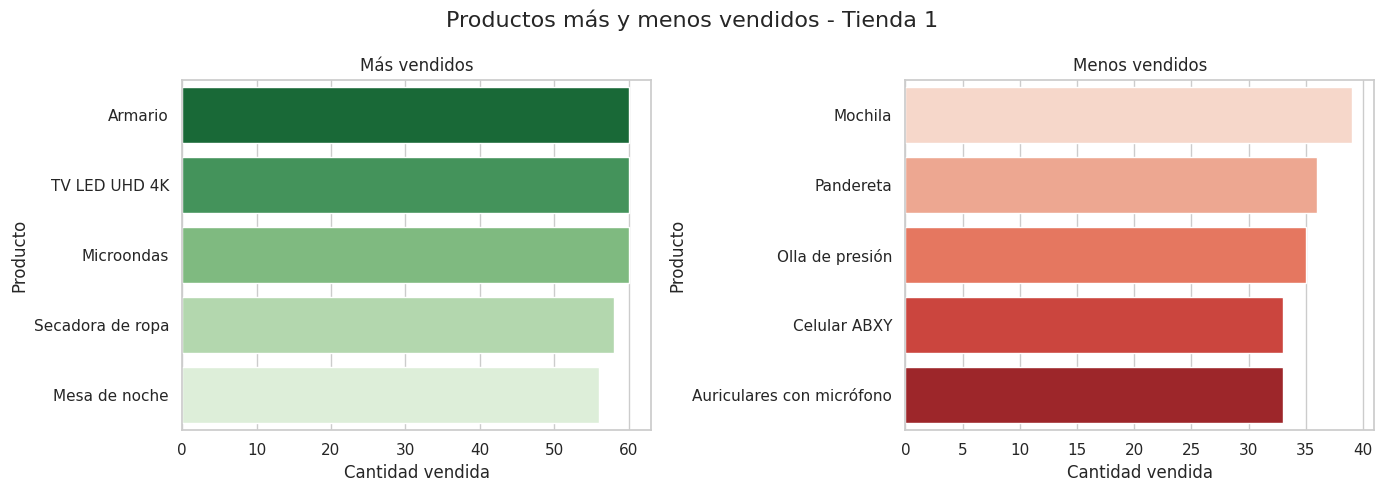

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_productos(mas_vendidos, menos_vendidos, titulo):
    fig, axs = plt.subplots(1, 2, figsize=(14,5))

    # Más vendidos
    sns.barplot(
        x=mas_vendidos.values,
        y=mas_vendidos.index,
        ax=axs[0],
        palette="Greens_r",
        hue=mas_vendidos.index,
        legend=False
    )
    axs[0].set_title("Más vendidos")
    axs[0].set_xlabel("Cantidad vendida")
    axs[0].set_ylabel("Producto")

    # Menos vendidos
    sns.barplot(
        x=menos_vendidos.values,
        y=menos_vendidos.index,
        ax=axs[1],
        palette="Reds",
        hue=menos_vendidos.index,
        legend=False
    )
    axs[1].set_title("Menos vendidos")
    axs[1].set_xlabel("Cantidad vendida")
    axs[1].set_ylabel("Producto")

    plt.suptitle(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()

# Graficar para Tienda 1
graficar_productos(mas_t1, menos_t1, "Productos más y menos vendidos - Tienda 1")

### *Tienda 2*

In [20]:
mas_t2, menos_t2 = productos_mas_menos_vendidos(tienda2, "Tienda 2")

print("Más vendidos Tienda 2:")
print(mas_t2)
print("\nMenos vendidos Tienda 2:")
print(menos_t2)

Más vendidos Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Producto, dtype: int64

Menos vendidos Tienda 2:
Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
Name: Producto, dtype: int64


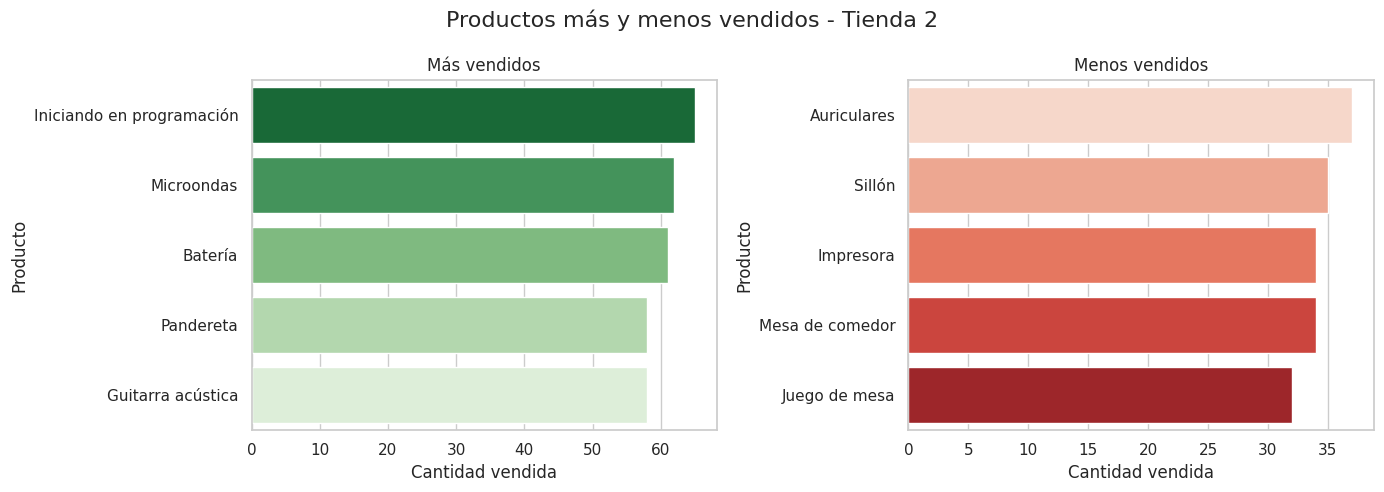

In [21]:
# Graficar para Tienda 2
graficar_productos(mas_t2, menos_t2, "Productos más y menos vendidos - Tienda 2")

### *Tienda 3*

In [22]:
mas_t3, menos_t3 = productos_mas_menos_vendidos(tienda3, "Tienda 3")

print("Más vendidos Tienda 3:")
print(mas_t3)
print("\nMenos vendidos Tienda 3:")
print(menos_t3)

Más vendidos Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: Producto, dtype: int64

Menos vendidos Tienda 3:
Producto
Guitarra eléctrica         38
Mochila                    36
Microondas                 36
Set de vasos               36
Bloques de construcción    35
Name: Producto, dtype: int64


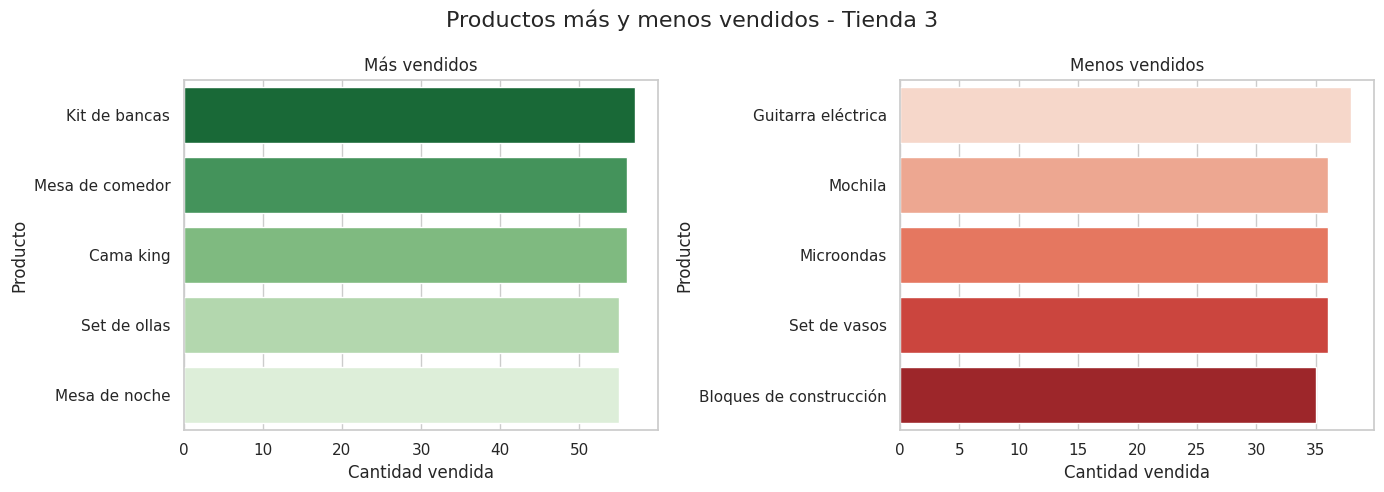

In [23]:
# Graficar para Tienda 3
graficar_productos(mas_t3, menos_t3, "Productos más y menos vendidos - Tienda 3")

### *Tienda 4*

In [24]:
mas_t4, menos_t4 = productos_mas_menos_vendidos(tienda4, "Tienda 4")

print("Más vendidos Tienda 3:")
print(mas_t4)
print("\nMenos vendidos Tienda 3:")
print(menos_t4)

Más vendidos Tienda 3:
Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
Name: Producto, dtype: int64

Menos vendidos Tienda 3:
Producto
Ciencia de datos con Python    38
Refrigerador                   38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: Producto, dtype: int64


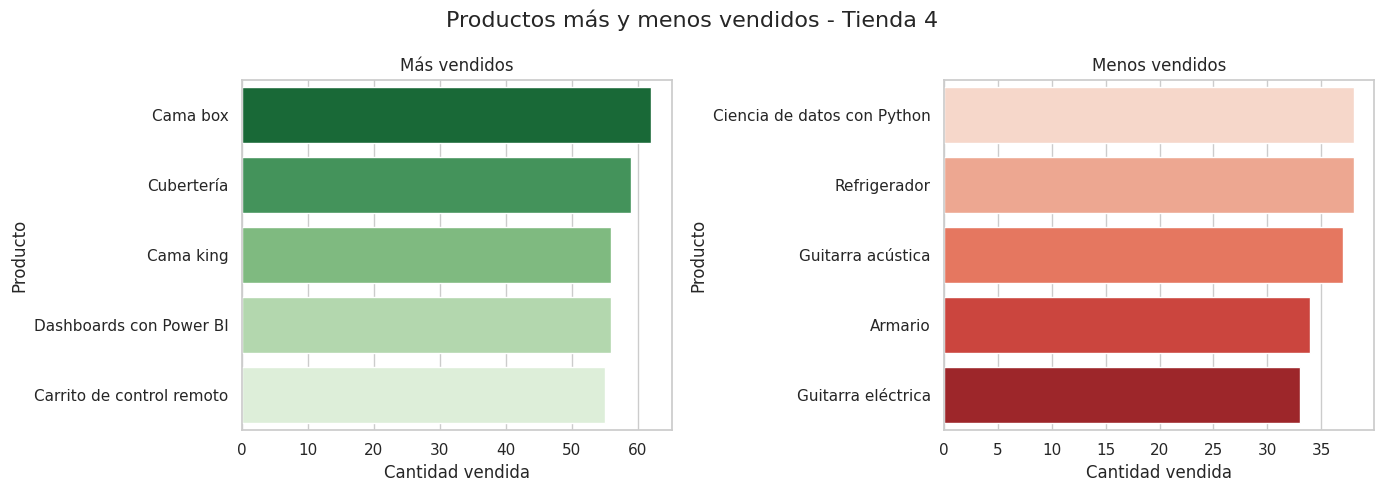

In [25]:
# Graficar para Tienda 4
graficar_productos(mas_t4, menos_t4, "Productos más y menos vendidos - Tienda 4")

# 5. Envío promedio por tienda

In [27]:
# Calcular el costo de envío promedio para cada tienda
envio_t1 = tienda["Costo de envío"].mean()
envio_t2 = tienda2["Costo de envío"].mean()
envio_t3 = tienda3["Costo de envío"].mean()
envio_t4 = tienda4["Costo de envío"].mean()

# Mostrar resultados
print(f"Costo de envío promedio Tienda 1: {envio_t1:.2f}")
print(f"Costo de envío promedio Tienda 2: {envio_t2:.2f}")
print(f"Costo de envío promedio Tienda 3: {envio_t3:.2f}")
print(f"Costo de envío promedio Tienda 4: {envio_t4:.2f}")


Costo de envío promedio Tienda 1: 26018.61
Costo de envío promedio Tienda 2: 25216.24
Costo de envío promedio Tienda 3: 24805.68
Costo de envío promedio Tienda 4: 23459.46


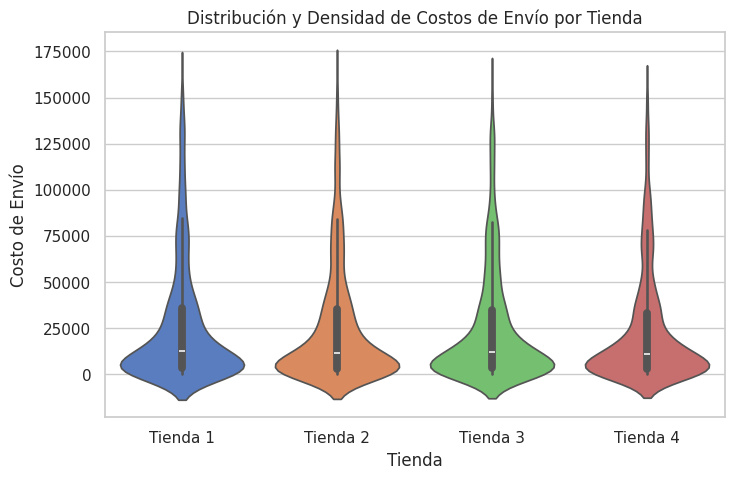

In [31]:
# Agregamos columna "Tienda" para combinar datos
t1 = tienda.copy();  t1["Tienda"] = "Tienda 1"
t2 = tienda2.copy(); t2["Tienda"] = "Tienda 2"
t3 = tienda3.copy(); t3["Tienda"] = "Tienda 3"
t4 = tienda4.copy(); t4["Tienda"] = "Tienda 4"

# Unimos en un solo DataFrame
todas_tiendas = pd.concat([t1, t2, t3, t4])

plt.figure(figsize=(8,5))
sns.violinplot(
    data=todas_tiendas,
    x="Tienda",
    y="Costo de envío",
    palette="muted",
    hue="Tienda",
    legend=False
)
plt.title("Distribución y Densidad de Costos de Envío por Tienda")
plt.ylabel("Costo de Envío")
plt.show()


# **Informe Final**

El presente informe tiene como objetivo evaluar el desempeño de cuatro tiendas a partir de distintos indicadores clave, con el fin de determinar cuál de ellas sería la más conveniente para que el Sr. Juan venda sus productos.
El análisis se realizó utilizando datos históricos de ventas, categorías de productos, calificaciones de clientes, productos más y menos vendidos, así como el costo de envío promedio.
A través de gráficos y cálculos estadísticos, se identificaron las fortalezas y debilidades de cada tienda para tomar una decisión fundamentada.

**1.   Ingresos Totales**

La tienda con mayor facturación fue la Tienda 1, lo que indica un alto volumen de ventas y potencial de mercado. La de menor facturación fue la Tienda 4, lo que podría implicar menor demanda.

**2.   Categorías de Productos Más Vendidas**

Las categorías más populares en todas las tienda fue: Muebles. Sin embargo, la tienda 3 destaca por vender más artículos en la categoría de Muebles, lo cual puede ser relevante si los productos del Sr. Juan pertenecen a esta categoría.

**3. Calificaciones Promedio de Clientes**

La tienda con mayor satisfacción de clientes fue la Tienda 3, mientras que la más baja fue la Tienda 1.

**4. Productos Más y Menos Vendidos**

Se identificaron los productos con mayor y menor rotación:

Tienda 1: Más vendido: Armario / Menos vendido: Auriculares con micrófono

Tienda 2: Más vendido: Iniciando en Programación / Menos vendido: Juego de Mesa

Tienda 3: Más vendido: Kit de Bancas / Menos vendido: Bloques de construcción

Tienda 4: Más vendido: Cama Box / Menos vendido: Guitarra Eléctrica

**5. Costo de Envío Promedio**

La tienda con menor costo de envío fue Tienda 4, lo que puede aumentar la competitividad.

**Conclusión y Recomendación**

Con base en los resultados anteriores:

La tienda con mayor facturación es Tienda 1.

Las categorías más demandadas en todas las tiendas coinciden con los productos que el Sr. Juan desea vender.

La tienda 3 presenta la mejor calificación promedio de clientes, reflejando un alto nivel de satisfacción.

Los costos de envío en la tienda 4 son más bajos, lo que podría favorecer ventas.

Recomendación:
Se sugiere que el Sr. Juan venda en Tienda 3, ya que presenta un equilibrio óptimo entre ingresos, satisfacción del cliente y competitividad en costos, además de que su catálogo de productos coincide con la demanda de la tienda. Aunque otras tiendas tienen fortalezas específicas, la Tienda 3 ofrece mejores condiciones generales para lograr ventas exitosas.